## Import Libraries and Dataframes

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
# Import hospital_general_information dataframe
path =  r'C:\Users\jmiel\JENNY_STUFF\MY_DOCS\CareerFoundry\U.S. Hospitals'
hospital_general_information = pd.read_csv(os.path.join(path, 'Data','Prepared Data', 'Hospital_General_Information_Clean.csv'), index_col = False)

In [145]:
hospital_general_information.columns

Index(['index', 'provider_id', 'hospital_name', 'address', 'city', 'state',
       'zip_code', 'county_name', 'phone_number', 'hospital_type',
       'hospital_ownership', 'emergency_services', 'hospital_overall_rating',
       'hospital_overall_rating_footnote', 'mortality_national_comparison',
       'mortality_national_comparison_footnote',
       'safety_of_care_national_comparison',
       'safety_of_care_national_comparison_footnote',
       'readmission_national_comparison',
       'readmission_national_comparison_footnote',
       'patient_experience_national_comparison',
       'patient_experience_national_comparison_footnote',
       'effectiveness_of_care_national_comparison',
       'effectiveness_of_care_national_comparison_footnote',
       'timeliness_of_care_national_comparison',
       'timeliness_of_care_national_comparison_footnote',
       'efficient_use_of_medical_imaging_national_comparison',
       'efficient_use_of_medical_imaging_national_comparison_footnote',


In [146]:
# Check the shape of the data after importing 
hospital_general_information.shape

(4818, 29)

## Data Cleaning

In [148]:
pd.isnull(hospital_general_information["hospital_overall_rating"])

0       False
1       False
2       False
3       False
4       False
        ...  
4813    False
4814    False
4815     True
4816     True
4817    False
Name: hospital_overall_rating, Length: 4818, dtype: bool

In [149]:
# Address missing values with 0 
hospital_general_information['hospital_overall_rating'].fillna(0, inplace=True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_11840\1546808941.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information['hospital_overall_rating'].fillna(0, inplace=True)


In [150]:
pd.isnull(hospital_general_information['hospital_overall_rating'])

0       False
1       False
2       False
3       False
4       False
        ...  
4813    False
4814    False
4815    False
4816    False
4817    False
Name: hospital_overall_rating, Length: 4818, dtype: bool

## Scatterplot

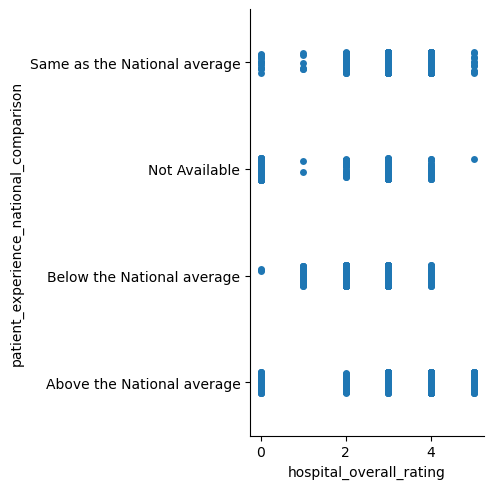

In [152]:
cat_plot_rating_vs_patient_experience = sns.catplot(x="hospital_overall_rating", y="patient_experience_national_comparison", data=hospital_general_information)

##### 

With lower ratings, a higher number of patients have below the national average in terms of experience. 
In contrast, the highest rating does not contain any below the national average variables. 0 rating indicates that the rating was not specified

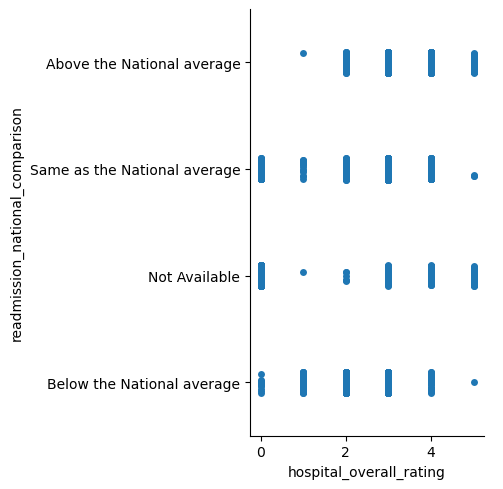

In [155]:
# Create a catplot with hospital overall rating and the readmission rate
cat_plot_rating_vs_readmisson = sns.catplot(x="hospital_overall_rating", y="readmission_national_comparison", data=hospital_general_information)

##### Observations
It can be noted that for hospital ratings, if there is a rating of 5 the readmission rate is below the national average at a less frequent rate. 
On the other hand, a rating of 1 has an above the national average readmission rate at a less frequent rate. Rating of 0 indicates the rating for the hosital was not specified. 

##### Hypothesis 
If the hospital rating is low, then there is a higher readmission rate.

In [158]:
# In readmission_national_comparison column, replace with numerical values 
hospital_general_information['readmission_national_comparison'].replace('Above the National average', '1', inplace = True)
hospital_general_information['readmission_national_comparison'].replace('Same as the National average', '2', inplace = True)
hospital_general_information['readmission_national_comparison'].replace('Below the National average', '3', inplace = True)
hospital_general_information['readmission_national_comparison'].replace('Not Available', '4', inplace = True)

C:\Users\jmiel\AppData\Local\Temp\ipykernel_11840\1432925679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hospital_general_information['readmission_national_comparison'].replace('Above the National average', '1', inplace = True)
C:\Users\jmiel\AppData\Local\Temp\ipykernel_11840\1432925679.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [159]:
hospital_general_information['readmission_national_comparison']=hospital_general_information.readmission_national_comparison.astype('int64')

In [160]:
# Reshape the variables needed into numpy arrays and put them into separate objects
X = hospital_general_information['hospital_overall_rating'].values.reshape(-1,1)
y = hospital_general_information['readmission_national_comparison'].values.reshape(-1,1)

In [161]:
X

array([[3.],
       [4.],
       [3.],
       ...,
       [0.],
       [0.],
       [2.]])

In [162]:
y

array([[1],
       [2],
       [2],
       ...,
       [2],
       [4],
       [2]], dtype=int64)

In [163]:
# Split dataframe into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [165]:
# Create a regression object 
regression = LinearRegression() 

In [166]:
# Fit the regression object to the training data 
regression.fit(X_train, y_train)

LinearRegression()

In [167]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

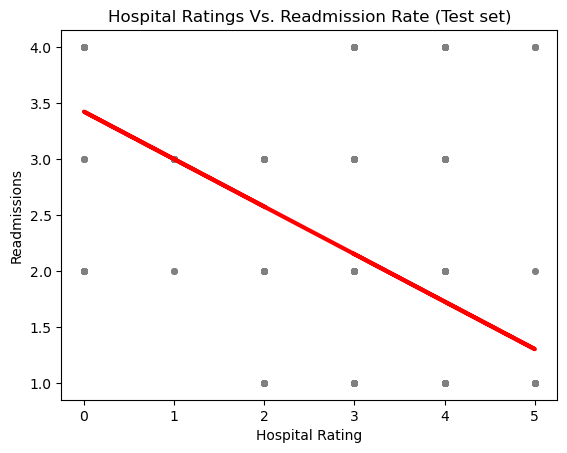

In [168]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Hospital Ratings Vs. Readmission Rate (Test set)')
plot_test.xlabel('Hospital Rating')
plot_test.ylabel('Readmissions')
plot_test.show()

##### The line does not fit close to the data points as this data contains primarily categorical data. 

In [190]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [192]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.42407492]]
Mean squared error:  0.570670391264542
R2 score:  0.4351485418767107


slope: Indicates a negative relationship, meaning the higher a hospital's rating, the lower the readmission rates.

Mean squared error: the value is smaller indicating the distance to the line is closer. 

R2 Score: The value is closer to 0 indicating a poor fit 

In [196]:
y_predicted

array([[2.14976877],
       [1.72569385],
       [2.14976877],
       ...,
       [1.30161894],
       [1.72569385],
       [2.57384369]])

In [198]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3,2.149769
1,2,1.725694
2,3,2.149769
3,2,1.725694
4,4,3.421994
5,3,2.149769
6,1,2.149769
7,4,2.149769
8,2,2.149769
9,2,3.421994


##### After analyzing the model performance statistics and the linear regression itself, this model did not perform as effective as expected. 
##### First, there was over 1,000 missing observations within the rating column, which creates a bias. For purposes of analysis, those values were left untouched. 
##### Furthermore, a single linear regression does not effectively illustrate the relationship between these variables as there are likely other factors to consider. 

## Compare how the linear regression fits the training set

In [206]:
# Predict X-train
y_predicted_train = regression.predict(X_train) 

In [208]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [210]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.42407492]]
Mean squared error:  0.5835994090822687
R2 score:  0.411522082240635


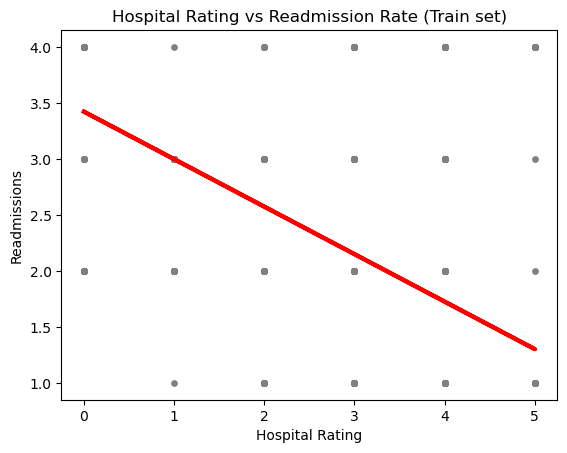

In [212]:
# Assess the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Hospital Rating vs Readmission Rate (Train set)')
plot_test.xlabel('Hospital Rating')
plot_test.ylabel('Readmissions')
plot_test.show()